#                                 What we can do with umbalanced data?

In [1]:
# ! pip install -U imbalanced-learn
# ! pip install mlxtend

In [2]:
import itertools

from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

from mlxtend.plotting import plot_decision_regions

import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt

%matplotlib inline

Suggest, we have some dataset. "Imbalanced" means that the count of examples from one class is much more, than from others. Let`s see how SVM work with different level of class balancing

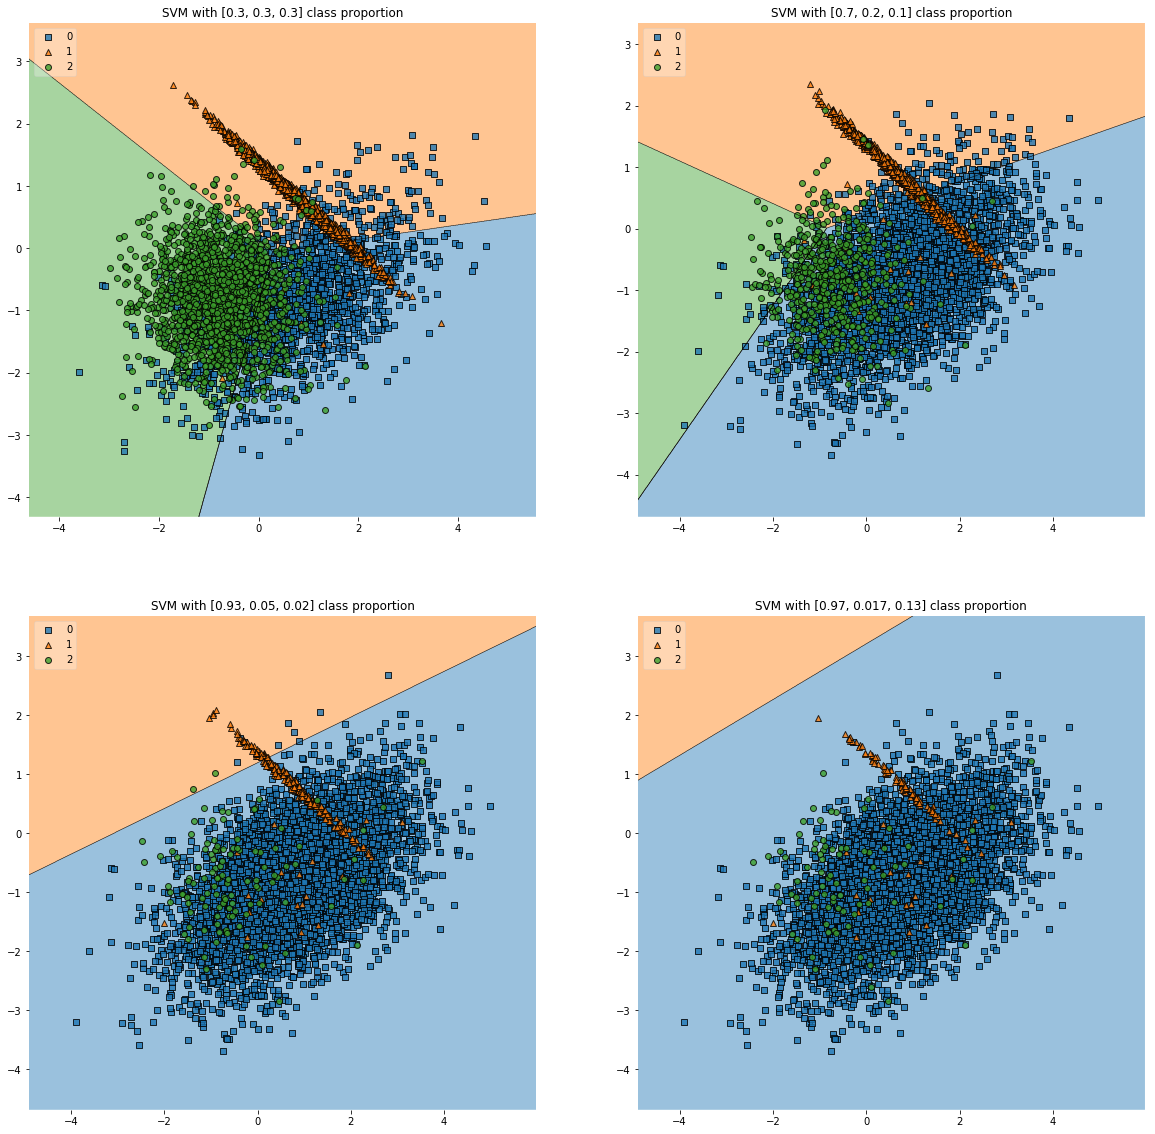

In [3]:
svm = LinearSVC(random_state=2019)
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,20))

class_weights = [[.3,  .3,   .3], 
                 [.7,  .2,   .1],
                 [.93, .05,  .02],
                 [.97, .017, .13]]

for _weights, grd in zip(class_weights, itertools.product([0, 1], repeat=2)):
    
    X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                            weights=_weights,
                            class_sep=0.8, random_state=42)
    svm.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=svm, legend=2)
    plt.title(f'SVM with {_weights} class proportion');

With a greater imbalanced ratio, the decision function favor the class with the larger number of samples, usually referred as the majority class. Roughly speaking, weight of class began depends on count samples. Also, we can`t use some metrics, like accuracy, if we have disproportion of samples. Consider, how we can solve this problem using http://imbalanced-learn.org/en/stable/index.html package.

### 1. Over-sampling
In this approach, we will try generate new samples in the classes which are under-represented.
+ **RandomOverSampler.**
It is most naive strategy, when we generate new samples by randomly sampling with replacement the current available samples. Like a bootstrap.
+ **Synthetic Minority Oversampling Technique (SMOTE)**
Generating new samples by interpolation.
+ **Adaptive Synthetic (ADASYN)**
Generating new samples by interpolation, but focus on the samples, that are wrong classified by  k-Nearest Neighbors algorithm.

Using TensorFlow backend.


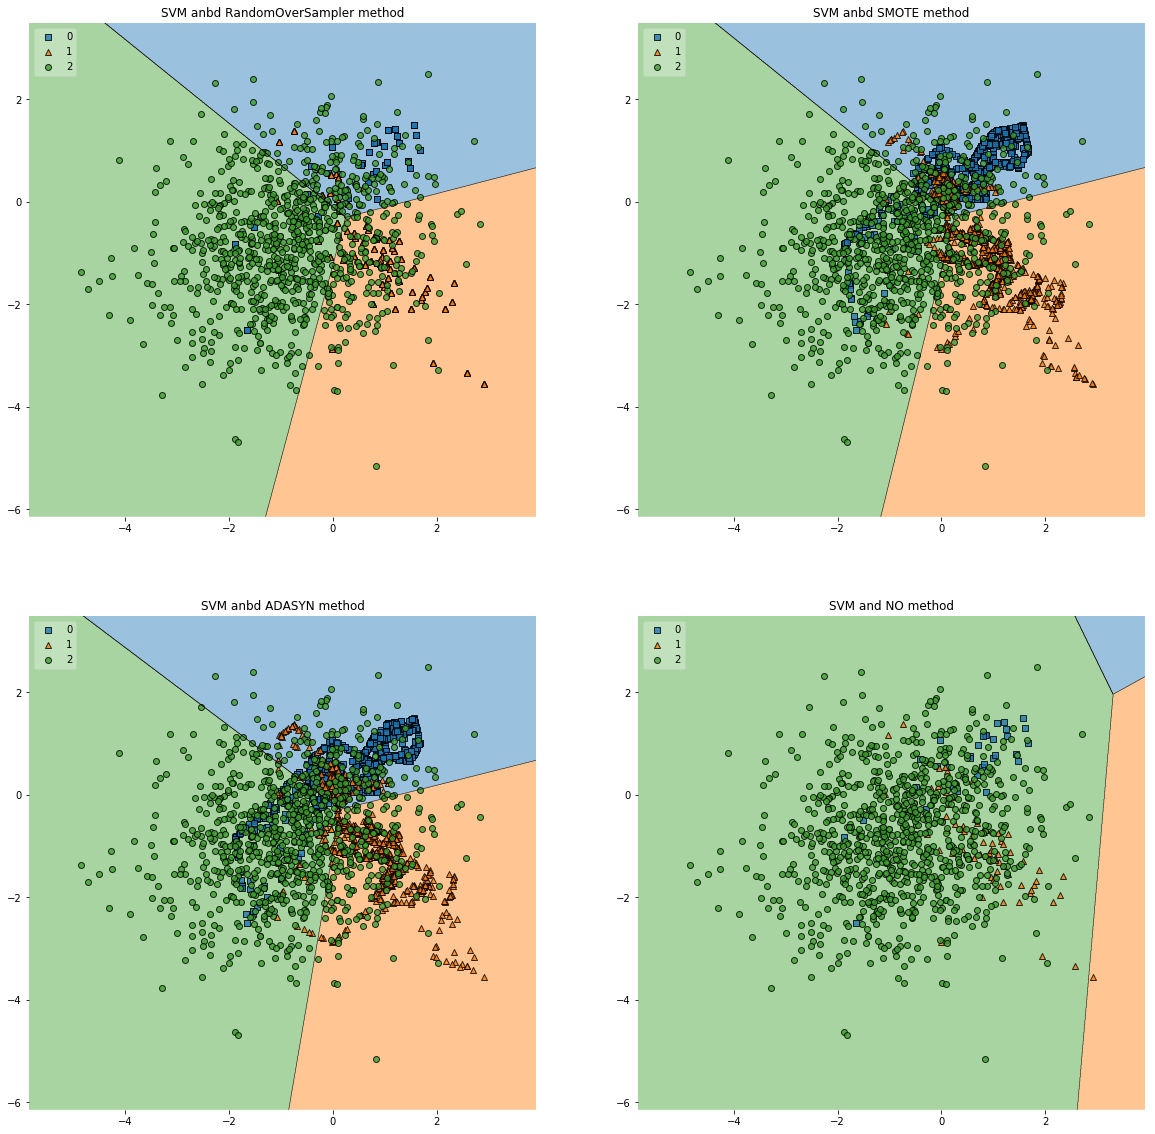

In [4]:
from imblearn.over_sampling import  RandomOverSampler, SMOTE, ADASYN

svm = LinearSVC(random_state=2019)
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,20))

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1, weights=[0.03, 0.07, 0.9],
                           class_sep=0.8, random_state=1)


resamplers = [ RandomOverSampler(random_state=42), 
              SMOTE(random_state=42), 
              ADASYN(random_state=42) ]

titles = ['RandomOverSampler', 'SMOTE', 'ADASYN']

for resampler, grd, title in zip(resamplers, itertools.product([0, 1], repeat=2), titles):
    X_resampled, y_resampled = resampler.fit_resample(X, y)
    svm.fit(X_resampled, y_resampled)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_resampled, y=y_resampled, clf=svm, legend=2)
    plt.title(f'SVM anbd {title} method');

svm.fit(X, y)
ax = plt.subplot(gs[1, 1])
fig = plot_decision_regions(X=X, y=y, clf=svm, legend=2)
plt.title(f'SVM and NO method');


As we can see, all methods help to improve decision surface.

### 2. Under-sampling
Given an original data set $S$, prototype generation algorithms will generate a new set $S'$ where $|S'| < |S|$ and $S' \not\in
S.$ In other words, prototype generation technique will reduce the number of samples in the targeted classes but the remaining samples are generated — and not selected — from the original set.

+ **ClusterCentroids** makes use of K-means to reduce the number of samples. Therefore, each class will be synthesized with the centroids of the K-means method instead of the original samples.

+ **RandomUnderSampler** is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes.

+ **NearMiss** is equal to  RandomUnderSampler with adds some heuristic rules to select samples.

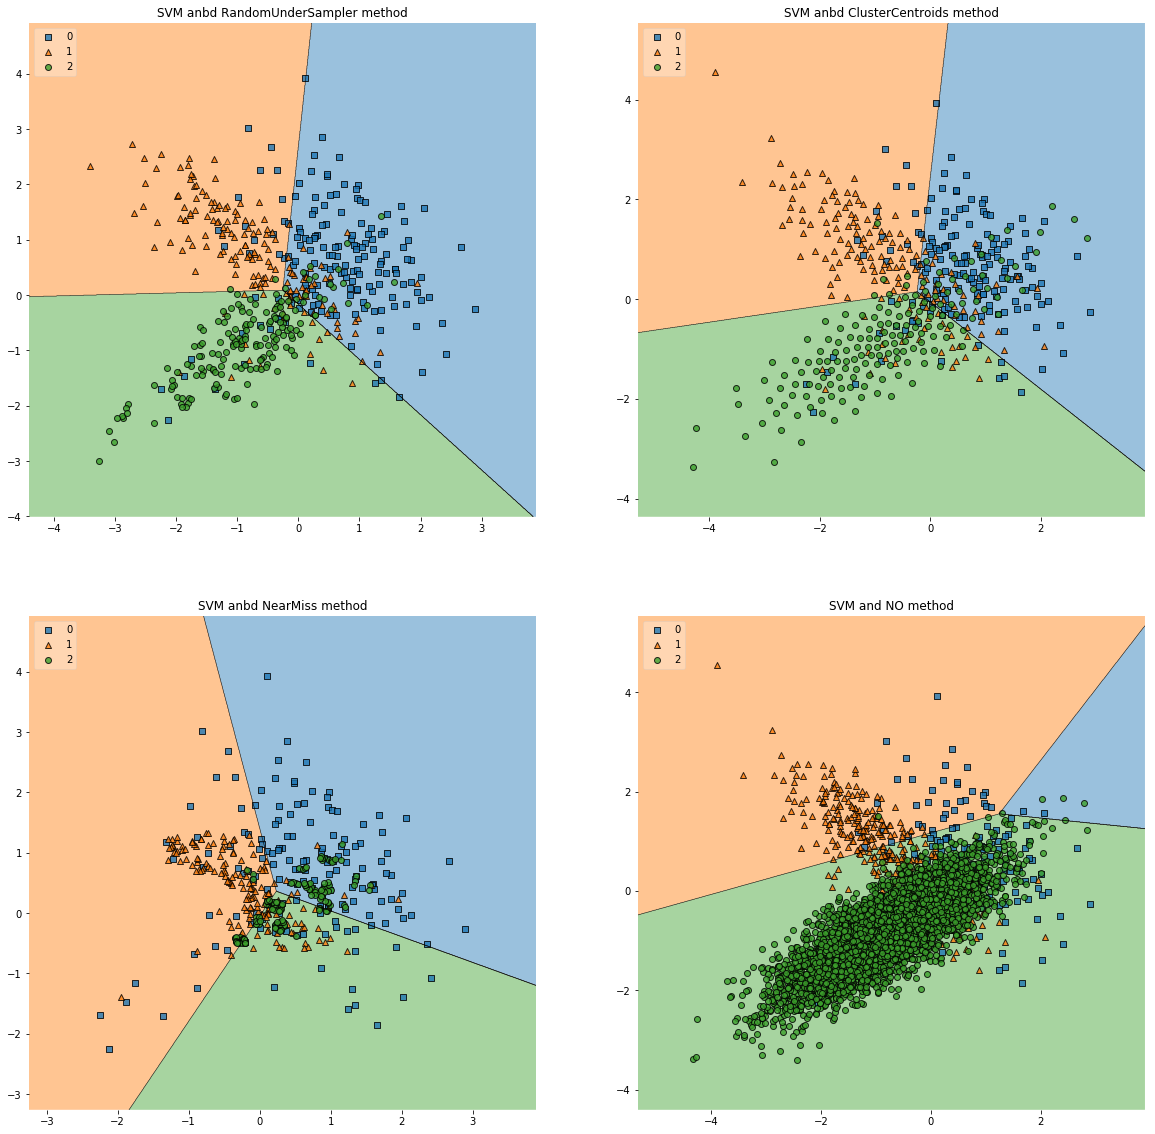

In [5]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss

svm = LinearSVC(random_state=2019)
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,20))

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1, weights=[0.03, 0.07, 0.9],
                           class_sep=0.8, random_state=1)


resamplers = [ RandomUnderSampler(random_state=42), 
              ClusterCentroids(random_state=42), 
              NearMiss(random_state=42) ]

titles = ['RandomUnderSampler', 'ClusterCentroids', 'NearMiss']

for resampler, grd, title in zip(resamplers, itertools.product([0, 1], repeat=2), titles):
    X_resampled, y_resampled = resampler.fit_resample(X, y)
    svm.fit(X_resampled, y_resampled)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_resampled, y=y_resampled, clf=svm, legend=2)
    plt.title(f'SVM anbd {title} method');

svm.fit(X, y)
ax = plt.subplot(gs[1, 1])
fig = plot_decision_regions(X=X, y=y, clf=svm, legend=2)
plt.title(f'SVM and NO method');

### 3. Try to combine over-sampling and under-sampling
It can be done by using class `SMOTEENN` from `imblearn.combine`. 

### 4. Do not forget about parameter `class_weight`.
It is supported by many classifiers from `sklearn`, you just need set this parameter to `'balanced'`

# Now, lets summarize.
The disproportion of class samples may influence on work of ML algorithms. To avoid that, we can add samples or drop samples by some procedures. The kind of procedure is another parameter to tune.